In [1]:
import csv
import pandas as pd

In [39]:
filepath = "Z:/Python/students.csv"

In [40]:
df = pd.read_csv(filepath)

In [3]:
print(df.head())

   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [20]:
print(df.shape)

(1000, 9)


In [21]:
print(df.describe)

<bound method NDFrame.describe of      gender race_ethnicity parental_level_of_education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test_preparation_course  math_score  reading_score  writing_score  \
0                      none 

In [22]:
print(df.columns)

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Average_score'],
      dtype='object')


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   Average_score                1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB
None


In [24]:
df.dropna(inplace=True)

In [25]:
df.drop_duplicates(inplace=True)

In [26]:
import matplotlib.pyplot as plt

In [8]:
df["Average_score"] = df[["math_score","reading_score","writing_score"]].mean(axis = 1)

In [27]:
print(df["Average_score"].head())

0    72.666667
1    82.333333
2    92.666667
3    49.333333
4    76.333333
Name: Average_score, dtype: float64


In [28]:
gender_avg = df.groupby("gender")[["math_score", "reading_score", "writing_score", "Average_score"]].mean()
print("\nAverage Scores by Gender:\n", gender_avg)


Average Scores by Gender:
         math_score  reading_score  writing_score  Average_score
gender                                                         
female   63.633205      72.608108      72.467181      69.569498
male     68.728216      65.473029      63.311203      65.837483


In [29]:
prep_avg = df.groupby("test_preparation_course")[["math_score", "reading_score", "writing_score", "Average_score"]].mean()


In [30]:
print(prep_avg.head())

                         math_score  reading_score  writing_score  \
test_preparation_course                                             
completed                 69.695531      73.893855      74.418994   
none                      64.077882      66.534268      64.504673   

                         Average_score  
test_preparation_course                 
completed                    72.669460  
none                         65.038941  


<Axes: title={'center': 'Average Scores by Gender'}, xlabel='gender'>

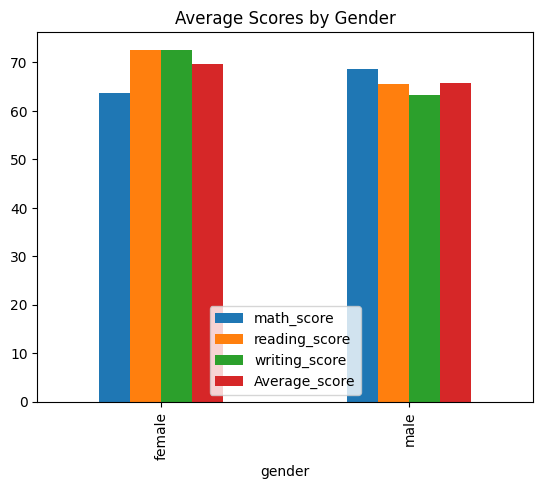

In [32]:
gender_avg.plot(kind="bar", title="Average Scores by Gender")


<Axes: title={'center': 'Average Scores by Gender'}, ylabel='Frequency'>

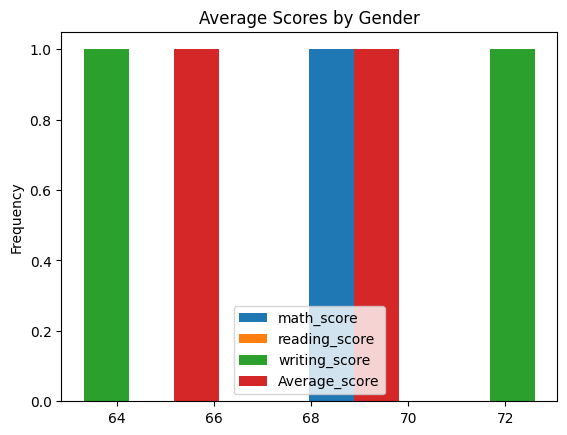

In [36]:
gender_avg.plot(kind="hist", title="Average Scores by Gender")

<Axes: title={'center': 'Average Scores by Test Preparation Course'}, xlabel='test_preparation_course'>

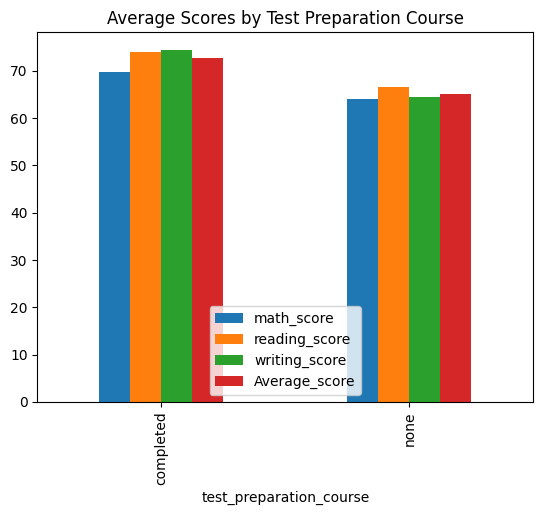

In [15]:
prep_avg.plot(kind="bar", title="Average Scores by Test Preparation Course")

Text(0.5, 1.0, 'Distribution of Average Scores')

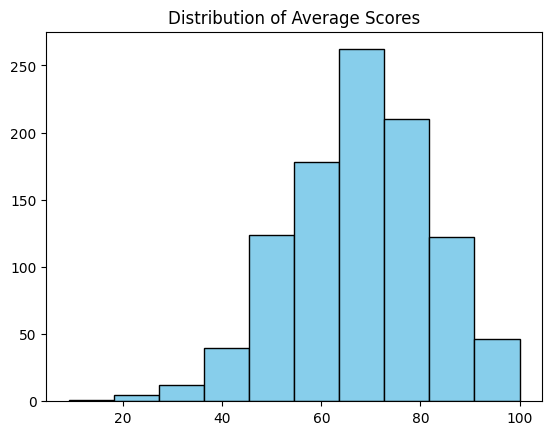

In [38]:
plt.hist(df["Average_score"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribution of Average Scores")

<Axes: title={'center': 'Average Score by Parental Education'}, ylabel='parental_level_of_education'>

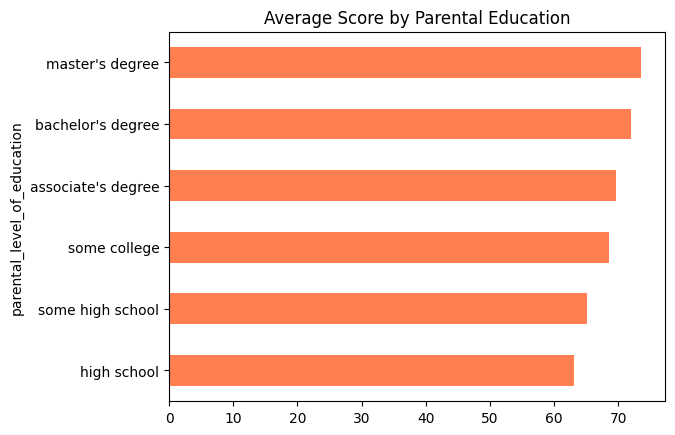

In [17]:
edu_avg = df.groupby("parental_level_of_education")["Average_score"].mean().sort_values()
edu_avg.plot(kind="barh", title="Average Score by Parental Education", color="coral")

In [18]:
print(edu_avg)

parental_level_of_education
high school           63.096939
some high school      65.108007
some college          68.476401
associate's degree    69.569069
bachelor's degree     71.923729
master's degree       73.598870
Name: Average_score, dtype: float64


In [19]:
df.to_csv("student_scores_cleaned.csv", index=False)